### Day 015 : Train First Machine Learning Model
***Today's Goal:*** move from data preparation → prediction.

### Import the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
# read the data 
df = pd.read_csv('clean_netflix_data.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,6.6,2279.0,0.600,6.9
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,8.1,391942.0,95.337,7.7


#### DATA PREPROCESSING 

In [3]:
# Select Final Features
y = df['imdb_score']
X = df.drop([
    'imdb_score',
    'id',
    'title',
    'description',
], axis=1)

# Convert ALL categorical columns at once
X = pd.get_dummies(X, drop_first=True)

# Remove Boolean Type
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Train Test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train a Baseline Model (Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Make Predictions

In [5]:
y_pred = model.predict(X_test)

In [6]:
y_pred

array([6.7910426 , 5.60067082, 6.15053839, ..., 7.44586964, 6.23517894,
       6.9943382 ], shape=(1161,))

### Evaluate Model Performance

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.6861872849813166
RMSE: 0.8330404519460435
R2 Score: 0.23402610664833834


### Compare Actual vs Predicted

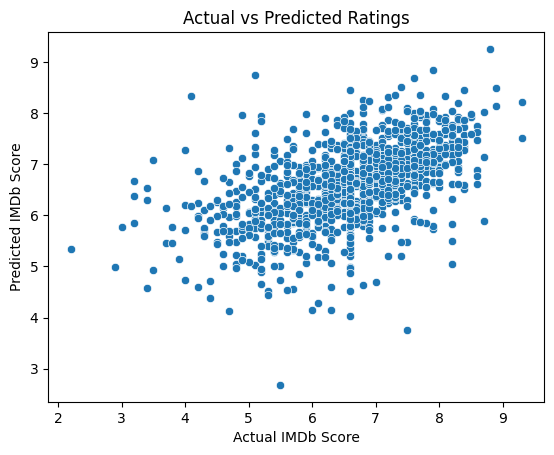

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual IMDb Score")
plt.ylabel("Predicted IMDb Score")
plt.title("Actual vs Predicted Ratings")
plt.show()


#### Learnings
- First regression model trained
- Predictions generated
- Model performance measured
- Visualization of prediction quality

| Metric   | Meaning                      | Better Value |
| -------- | ---------------------------- | ------------ |
| MAE      | Avg prediction error         | Lower        |
| RMSE     | Penalizes large errors more  | Lower        |
| R² Score | How well model explains data | Closer to 1  |

